## Observations and Insights

* Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.
* Observation 1: Based on the information from the bar graph, we can determine that we have more datapoints for the Capomulin and Ramicane Drugs.
* Observation 2: Based on the information from the Box and Whiskers Plot, we can determine that Capomulin and Ramicane are the more effective drugs for treating mice with tumors. However we have to keep in mind that we have more information on these two drugs. 
* Observation 3: Finally, based on the scatterplot and linear regression, we can determine that there is a postitive correlation between average tumor volume and mouse weight. This implies that mice that weigh more are more likely to develop tumors. We can use this to determine if weight is a factor in human tumor development. 

## Dependencies and starter code

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results)
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
#Split up data into groups based on 'Drug Regimen'
DrugReg = mouse_study["Drug Regimen"]
MouseId = mouse_study["Mouse ID"]
TumorVol = mouse_study["Tumor Volume (mm3)"]
reduced_mouse = pd.DataFrame({"Mouse ID":MouseId, "Drug Regimen":DrugReg, "Tumor Volume":TumorVol})
reduced_mouse.head()

,Mouse ID,Drug Regimen,Tumor Volume
0,k403,Ramicane,45.000000
1,k403,Ramicane,38.825898
2,k403,Ramicane,35.014271
3,k403,Ramicane,34.223992
4,k403,Ramicane,32.997729


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Mean = reduced_mouse.groupby("Drug Regimen").mean()["Tumor Volume"]
Median = reduced_mouse.groupby("Drug Regimen").median()["Tumor Volume"]
Variance = reduced_mouse.groupby("Drug Regimen").var()["Tumor Volume"]
SD = reduced_mouse.groupby("Drug Regimen").std()["Tumor Volume"]
SEM = reduced_mouse.groupby("Drug Regimen").sem()["Tumor Volume"]

df = pd.DataFrame({"Mean":Mean, "Median":Median, "Variance":Variance, "Standard Deviation":SD, "SEM":SEM})
df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

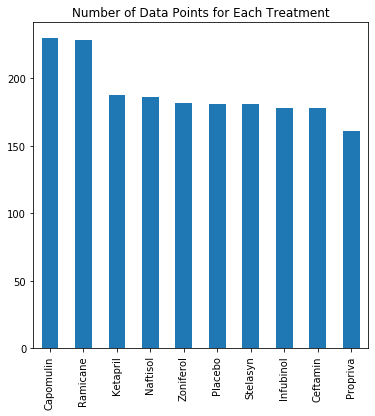

<Figure size 432x288 with 0 Axes>

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
treatments = mouse_study["Drug Regimen"].value_counts()
treatments.plot(kind="bar", figsize=(6,6))
plt.title("Number of Data Points for Each Treatment")
plt.show()
plt.tight_layout()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

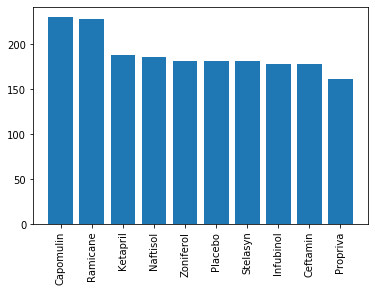

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
mouse_two = mouse_study["Drug Regimen"].value_counts()
plt.bar(mouse_two.index.values, mouse_two.values)
plt.xticks(rotation=90)

## Pie plots

<function matplotlib.pyplot.show(*args, **kw)>

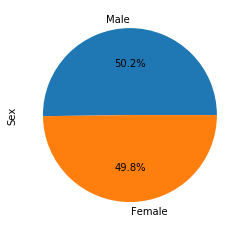

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_three = mouse_metadata.Sex.value_counts()
mouse_three.plot(kind="pie", autopct="%1.1f%%")
plt.show

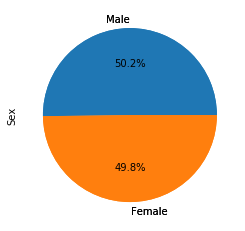

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_three.values,labels=mouse_three.index.values)
mouse_three.plot(kind="pie", autopct="%1.1f%%")

## Quartiles, outliers and boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
mouse_four = mouse_study.groupby(["Mouse ID"]).max()
mouse_four = mouse_four.reset_index()
merge_mouse = mouse_four[["Mouse ID", "Timepoint"]].merge(mouse_study, on=["Mouse ID", "Timepoint"], how="left")

Drug_one = merge_mouse.loc[merge_mouse["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
Drug_two = merge_mouse.loc[merge_mouse["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
Drug_three = merge_mouse.loc[merge_mouse["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
Drug_four = merge_mouse.loc[merge_mouse["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]

  #  [Capomulin, Ramicane, Infubinol, Ceftamin]

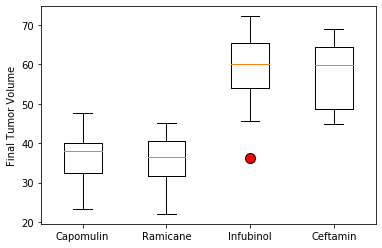

In [72]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
color = dict(markerfacecolor = "red", markersize = 10)
plt.boxplot([Drug_one, Drug_two, Drug_three, Drug_four], labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], 
flierprops = color)
plt.ylabel("Final Tumor Volume")
plt.show()



## Line and scatter plots

Text(0.5, 1.0, 'Tumor Volume With Capomulin Drug Treatment')

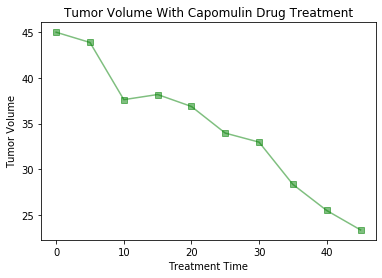

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Time point vs Tumor Volume 

# Filter down to Capomulin
filter_a = mouse_study["Drug Regimen"]=="Capomulin"
choice = mouse_study[filter_a]

filter_b = choice["Mouse ID"]=="s185"
choice_b = choice[filter_b]

# Define X and Y axis
x_axis = choice_b["Timepoint"] 
mouse_vol = choice_b["Tumor Volume (mm3)"]

# Plot line
line = plt.plot(x_axis, mouse_vol, marker="s", color = "green", alpha= 0.5,)
plt.xlabel("Treatment Time")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume With Capomulin Drug Treatment")

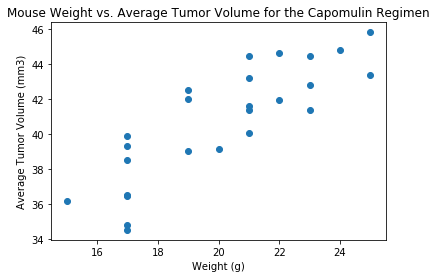

In [61]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

new_v = mouse_study.loc[mouse_study["Drug Regimen"]=="Capomulin"]
new_z = new_v.groupby(["Mouse ID"]).mean()

plt.scatter(new_z["Weight (g)"],new_z["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen")
plt.show()



#plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.5)
#plt.xlabel("Mouse Weight")
#plt.ylabel("Average Tumor Volume")
#plt.title("Mouse Weight vs. Average Tumor Volume for the Capomulin regimen")


The correlation between mouse weight and the average tumor volume is 0.84


Text(0.5, 1.0, 'Correlation Between Mouse Weight and Average Tumor Volume')

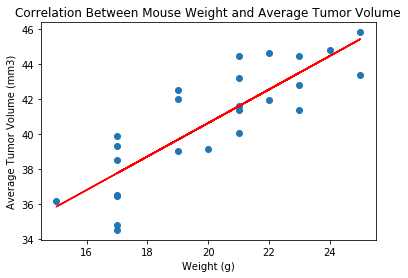

In [69]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(new_z['Weight (g)'],new_z['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(new_z['Weight (g)'],new_z['Tumor Volume (mm3)'])
y_values = new_z['Weight (g)']*model[0]+model[1]
plt.scatter(new_z['Weight (g)'],new_z['Tumor Volume (mm3)'])
plt.plot(new_z['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Correlation Between Mouse Weight and Average Tumor Volume")
